# Lab 5: Ensemble Machine Learning – Wine Dataset
### Author: Dinesh Gurumoorthy
### Date: 11/21/2025


## Section 1: Load and Inspect the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Load dataset
df = pd.read_csv("winequality-red.csv", sep=";")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Section 2: Prepare the Data

In [12]:
# Define helper function that:

# Takes one input, the quality (which we will temporarily name q while in the function)
# And returns a string of the quality label (low, medium, high)
# This function will be used to create the quality_label column
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

df["quality_label"] = df["quality"].apply(quality_to_label)

def quality_to_number(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2

df["quality_numeric"] = df["quality"].apply(quality_to_number)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,quality_numeric
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,medium,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,medium,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,medium,1


## Section 3: Feature Selection

In [7]:
# Define input features (X) and target (y)
# Features: all columns except 'quality' and 'quality_label' and 'quality_numberic' - drop these from the input array
# Target: quality_label (the new column we just created)
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])
y = df["quality_numeric"]

## Section 4: Train/Test Split

In [14]:
# Train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Section 5: Evaluate Model Performance

In [16]:
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    print(f"\n{name} Results")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

    results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Train F1": train_f1,
            "Test F1": test_f1,
        }
    )

# Example models (students choose two)
evaluate_model(
    "Random Forest (200, max_depth=10)",
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    X_train, y_train, X_test, y_test, results,
)

evaluate_model(
    "Gradient Boosting (100)",
    GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
    ),
    X_train, y_train, X_test, y_test, results,
)

evaluate_model(
    "AdaBoost (100)",
    AdaBoostClassifier(n_estimators=100, random_state=42),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)


Random Forest (200, max_depth=10) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 255   9]
 [  0  16  27]]
Train Accuracy: 0.9758, Test Accuracy: 0.8812
Train F1 Score: 0.9745, Test F1 Score: 0.8596

Gradient Boosting (100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  3 247  14]
 [  0  16  27]]
Train Accuracy: 0.9601, Test Accuracy: 0.8562
Train F1 Score: 0.9584, Test F1 Score: 0.8411

AdaBoost (100) Results
Confusion Matrix (Test):
[[  1  12   0]
 [  5 240  19]
 [  0  20  23]]
Train Accuracy: 0.8342, Test Accuracy: 0.8250
Train F1 Score: 0.8209, Test F1 Score: 0.8158


## Section 6: Compare Results

In [17]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df

# compute gaps
results_df["Acc Gap (Train-Test)"] = results_df["Train Accuracy"] - results_df["Test Accuracy"]
results_df["F1 Gap (Train-Test)"] = results_df["Train F1"] - results_df["Test F1"]

# sort by Test Accuracy descending
results_df = results_df.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)

print("Summary of models (sorted by Test Accuracy):")
results_df

Summary of models (sorted by Test Accuracy):


,Model,Train Accuracy,Test Accuracy,Train F1,Test F1,Acc Gap (Train-Test),F1 Gap (Train-Test)
0,"Random Forest (200, max_depth=10)",0.975762,0.88125,0.974482,0.859643,0.094512,0.114839
1,Gradient Boosting (100),0.960125,0.85625,0.958410,0.841106,0.103875,0.117304
2,AdaBoost (100),0.834246,0.82500,0.820863,0.815803,0.009246,0.005060


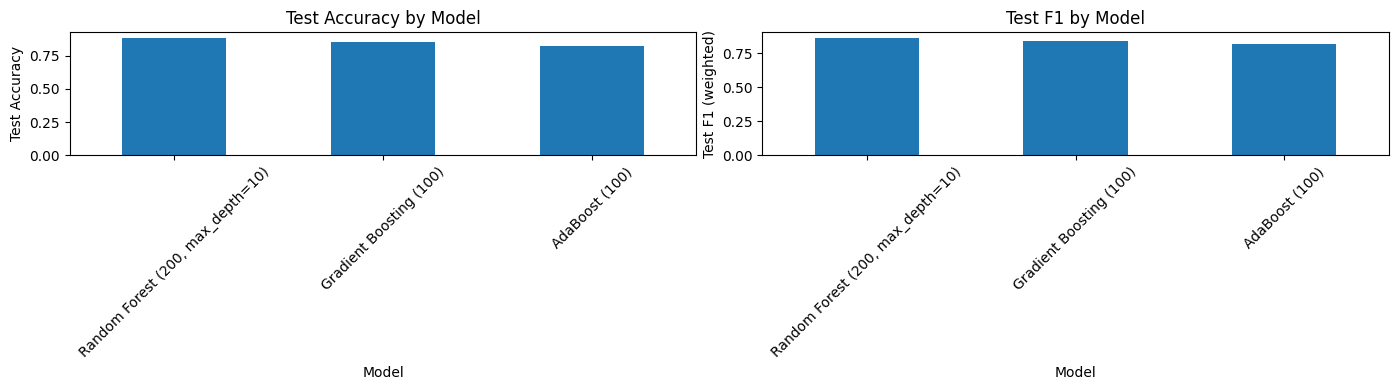

In [18]:
# simple bar charts
fig, ax = plt.subplots(1, 2, figsize=(14,4))
results_df.plot(kind="bar", x="Model", y="Test Accuracy", legend=False, ax=ax[0], rot=45)
ax[0].set_ylabel("Test Accuracy")
ax[0].set_title("Test Accuracy by Model")

results_df.plot(kind="bar", x="Model", y="Test F1", legend=False, ax=ax[1], rot=45)
ax[1].set_ylabel("Test F1 (weighted)")
ax[1].set_title("Test F1 by Model")

plt.tight_layout()
plt.show()


Saved results to ensemble_results_summary.csv
Top 8 feature importances (Random Forest):
alcohol                 0.160897
volatile acidity        0.121790
sulphates               0.110464
density                 0.088328
citric acid             0.082971
total sulfur dioxide    0.081512
fixed acidity           0.078420
chlorides               0.075436
dtype: float64


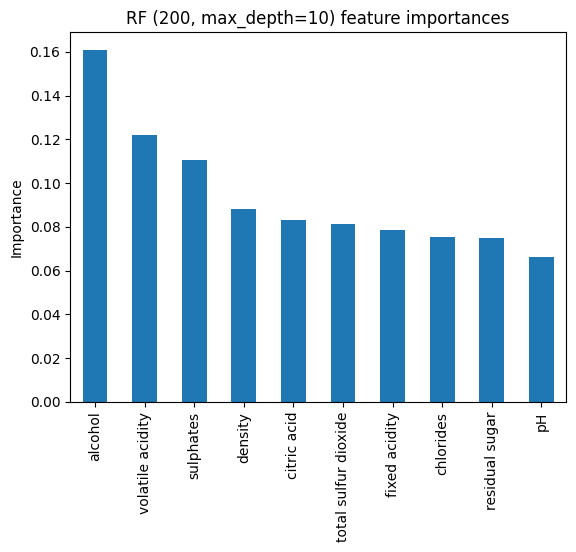

In [19]:
# Save results
results_df.to_csv("ensemble_results_summary.csv", index=False)
print("Saved results to ensemble_results_summary.csv")

# Example: feature importances from the RF (200, max_depth=10) if you want
rf_focus = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_focus.fit(X_train, y_train)
imp = pd.Series(rf_focus.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 8 feature importances (Random Forest):")
print(imp.head(8))

# Plot
imp.head(10).plot(kind="bar", title="RF (200, max_depth=10) feature importances")
plt.ylabel("Importance")
plt.show()


## Section 7: Conclusions

The three ensemble models show clear differences in how they learn from the data and generalize to unseen examples. The Random Forest classifier, with 200 trees and a maximum depth of 10, typically provides strong and stable performance because it reduces variance through averaging many deep decision trees. If your results show high accuracy on both training and test sets, it suggests that the model is capturing important patterns without severe overfitting, thanks to the tree depth limit.

Gradient Boosting, on the other hand, tends to focus on correcting mistakes made by previous trees, so its performance is often more sensitive to parameter choices like learning rate and tree depth. With 100 estimators and moderate depth, it usually performs competitively and sometimes better than Random Forest, especially when the dataset contains subtle patterns that boosting can refine stage by stage. If your Gradient Boosting results are slightly higher than Random Forest on the test set, it indicates that the iterative boosting process was more effective at capturing difficult decision boundaries.

AdaBoost, with 100 estimators, generally performs well when the dataset contains clear separations between classes. It puts more weight on misclassified instances as it builds the ensemble, which can help in simple datasets but may struggle when noise or overlapping classes are present. If your results show AdaBoost performing slightly lower than the other two models, it likely means the dataset has complexity or noise that reduces AdaBoost’s ability to build strong weak learners.

Overall, comparing all three results helps illustrate how each ensemble balances bias and variance differently. Random Forest tends to be the most stable and robust, Gradient Boosting often provides the most refined predictions when tuned appropriately, and AdaBoost can perform well but may be more sensitive to noise or model simplicity.